In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
from math import radians
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [2]:
# Loading Dataset.
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [3]:
# Taking a view of the dataset.
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
# Converting Transaction date column into integer
df['Transaction date'] = df['Transaction date'].astype(int)
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
# Unique transaction date and their value counts.
df['Transaction date'].value_counts()

2013    288
2012    126
Name: Transaction date, dtype: int64

In [6]:
# As we have only two unique years in transaction date, this column does not seems to be important hence setting it as index.
df.set_index(keys=['Transaction date'],inplace=True)

In [7]:
# Calculating total price of the house.
df['Price'] = df['House size (sqft)'] * df['House price of unit area']

In [8]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
Transaction date,,,,,,,,,
2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1


In [9]:
# Checking for additional information about the dataset and column datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 2012 to 2013
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   House Age                                 414 non-null    float64
 1   Distance from nearest Metro station (km)  414 non-null    float64
 2   Number of convenience stores              414 non-null    int64  
 3   latitude                                  414 non-null    float64
 4   longitude                                 414 non-null    float64
 5   Number of bedrooms                        414 non-null    int64  
 6   House size (sqft)                         414 non-null    int64  
 7   House price of unit area                  414 non-null    float64
 8   Price                                     414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 32.3 KB


In [10]:
# dataset size
df.shape

(414, 9)

In [11]:
# Checking for features statistics.
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,35597.804106
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,19890.892075
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,5440.400000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,20482.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,31224.200000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,48439.375000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,161327.500000


In [12]:
# Null values check
df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
Price                                       0
dtype: int64

No null values in the dataset.

array([[<AxesSubplot:title={'center':'House Age'}>,
        <AxesSubplot:title={'center':'Distance from nearest Metro station (km)'}>,
        <AxesSubplot:title={'center':'Number of convenience stores'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Number of bedrooms'}>],
       [<AxesSubplot:title={'center':'House size (sqft)'}>,
        <AxesSubplot:title={'center':'House price of unit area'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

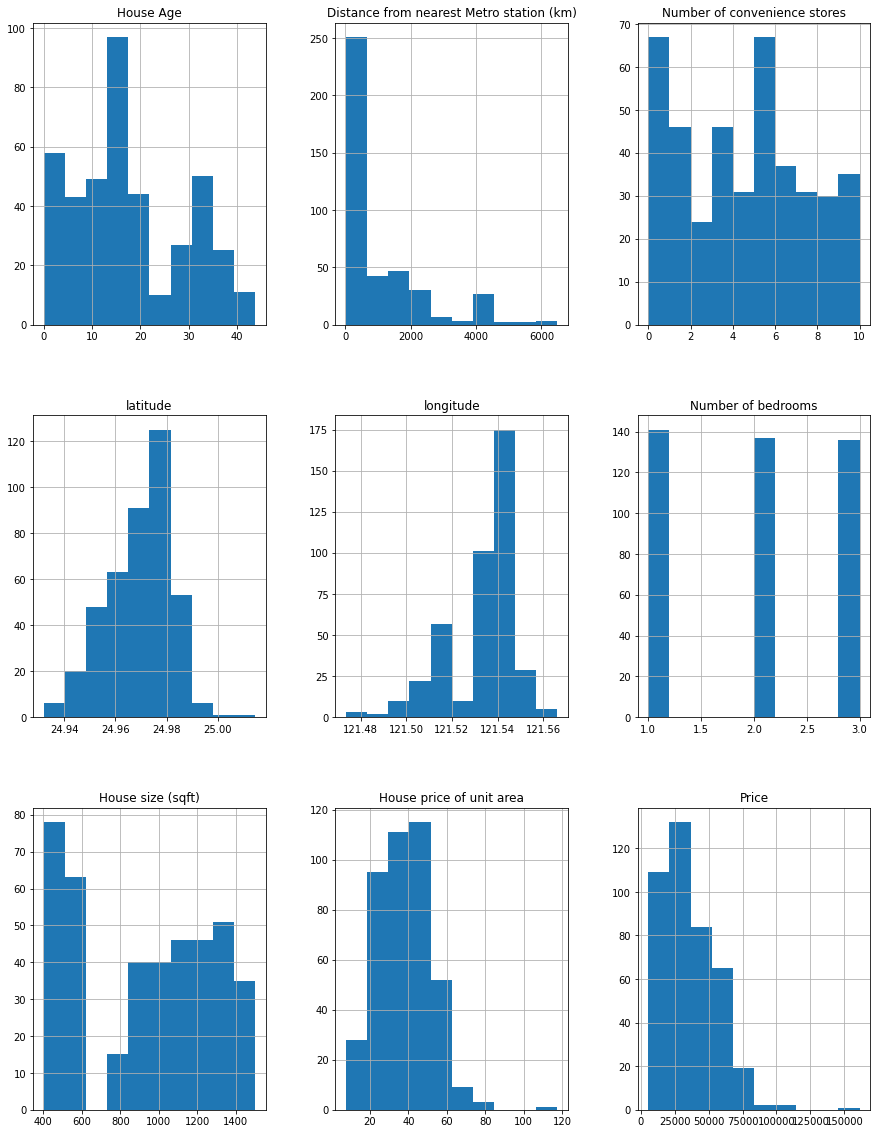

In [13]:
# Visualizing features through histograms (Frequency graph)
df.hist(figsize = (15,20))

In [14]:
df.dtypes

House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
Price                                       float64
dtype: object

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<seaborn.axisgrid.FacetGrid at 0x2b9b53e65c0>,)

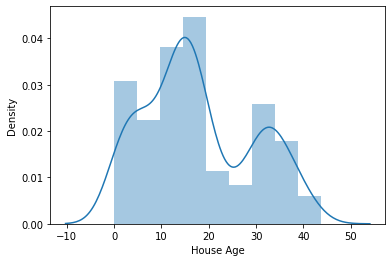

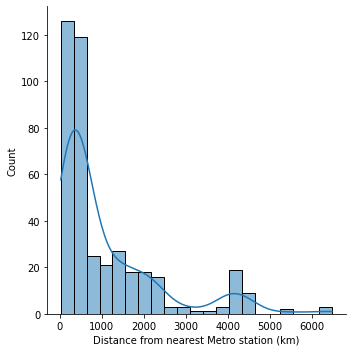

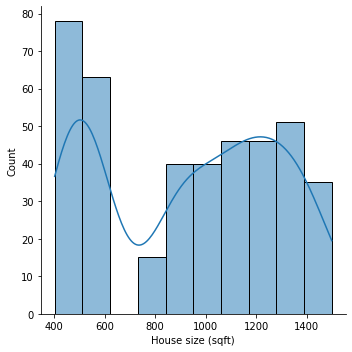

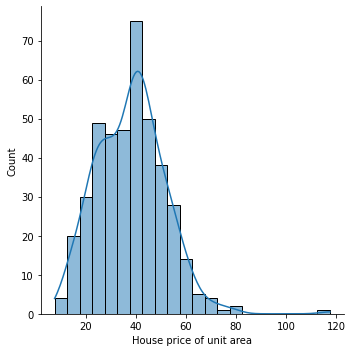

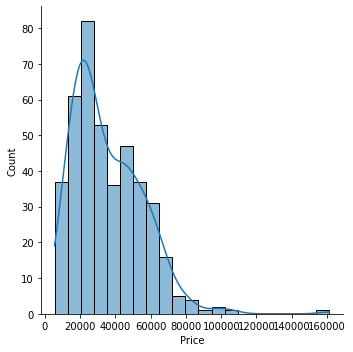

In [15]:
# Plotting kde plot for continuous features for checking their ditributions.

sns.distplot(df['House Age'], kde=True),
sns.displot(df['Distance from nearest Metro station (km)'], kde = True),
sns.displot(df['House size (sqft)'], kde = True),
sns.displot(df['House price of unit area'], kde = True),
sns.displot(df['Price'], kde = True),

'House Age', 'Price', 'House price of unit area' columns follow gaussian distributions.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House Age'>

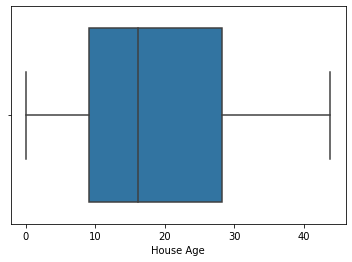

In [16]:
# Outliers check in column- 'House Age'
sns.boxplot(df['House Age'])

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

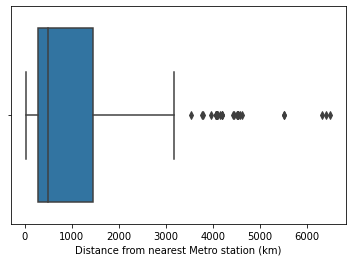

In [17]:
# Outliers check in column- 'Distance from nearest Metro station (km)'
sns.boxplot(df['Distance from nearest Metro station (km)'])

this feature has outliers and is right skewed.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House size (sqft)'>

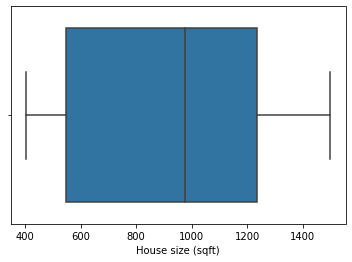

In [18]:
# Boxplot for outliers check.
sns.boxplot(df['House size (sqft)'])

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House price of unit area'>

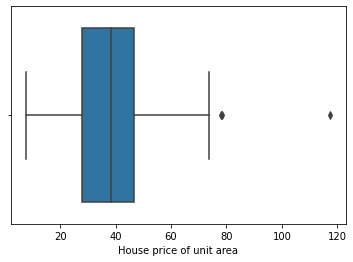

In [19]:
# Boxplot for outliers check.
sns.boxplot(df['House price of unit area'])

This feature has outliers and is right skewed.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

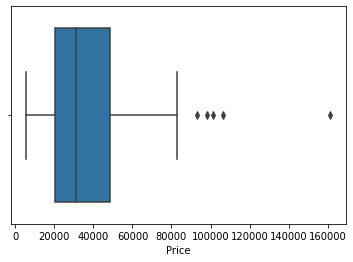

In [20]:
# Checking outliers.
sns.boxplot(df['Price'])

This feature has outliers and is right skewed.

In [21]:
# Now we will proceed to visualize latitude and longitude using folium library.
# We will use Number of bedrooms for this.
df['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [22]:
# Creating a new column 'House_color' by using 'Number of bedrooms' column.
mapping = {3: 'green', 2: 'blue', 1: 'cyan'}
df['House_color'] = df['Number of bedrooms'].apply(lambda x: mapping[x])
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price,House_color
Transaction date,,,,,,,,,,
2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5,cyan
2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0,blue
2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0,green
2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0,blue
2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1,cyan


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

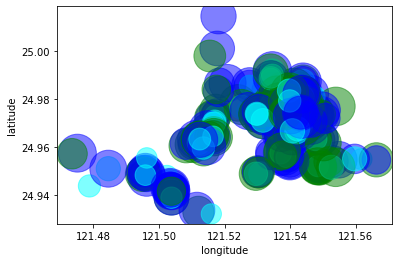

In [23]:
# Plotting coordinates for visualizing location distribution.
df.plot.scatter(x='longitude', y='latitude', s='House size (sqft)', c='House_color', alpha=.5)

# Treating Outliers.


* Feature = Distance from nearest Metro station (km)
* Right skewed
* Hence following IQR Method.

In [24]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["Distance from nearest Metro station (km)"].quantile(0.25)
q2 = df["Distance from nearest Metro station (km)"].quantile(0.75)

In [25]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [26]:
# Finding lower and upper boundry.
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-1458.1065000000003
3201.7103


(None, None)

In [27]:
# Ignoring the lower boundry as it is a negative value and capping the features to upper boundry only.
df.loc[df['Distance from nearest Metro station (km)'] >=upper_bridge,'Distance from nearest Metro station (km)'] = upper_bridge

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance from nearest Metro station (km)'>

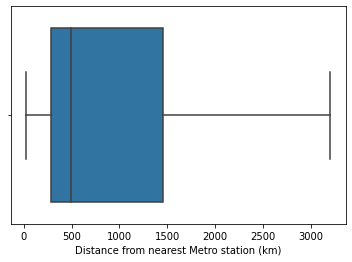

In [28]:
# Plotting after romoving outliers.
sns.boxplot(df['Distance from nearest Metro station (km)'])

<AxesSubplot:>

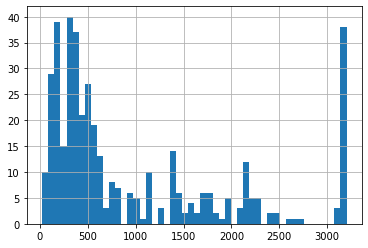

In [29]:
# All the outliers are capped to upper boundry.
df['Distance from nearest Metro station (km)'].hist(bins=50)

* Feature = House price of unit area
* Normally Distributed.
* Anything outside the 3 standard deviation considered as Outliers.

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

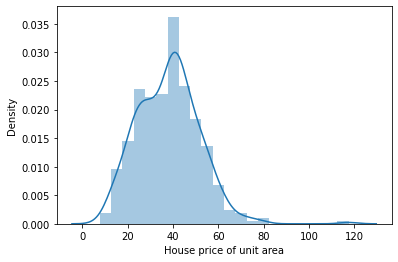

In [30]:
# Plotting kde plot for checking its distribution type.--> It follows gaussian distribution.
sns.distplot(df['House price of unit area'], kde=True)

<AxesSubplot:>

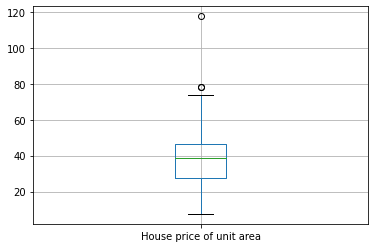

In [31]:
# Outliers present.
df.boxplot('House price of unit area')

In [32]:
# minimun value is 7 and maximum is 117.
df['House price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: House price of unit area, dtype: float64

In [33]:
# Calculating lower and upper boundry by removing 3 standard deviation values.
upper_boundry = df['House price of unit area'].mean() + 3 * df['House price of unit area'].std()
lower_boundry = df['House price of unit area'].mean() - 3 * df['House price of unit area'].std()

In [34]:
print(lower_boundry, upper_boundry)

-2.839269856490965 78.79965632992091


In [35]:
# As lower boundry is a negative value, we will capping the outliers to upper boundry only.
df.loc[df['House price of unit area'] >=upper_boundry,'House price of unit area'] = upper_boundry

<AxesSubplot:>

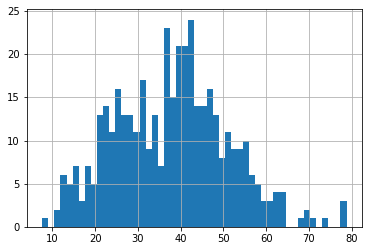

In [36]:
# All the outliers of thi feature is capped to upper boundry.
df['House price of unit area'].hist(bins=50)

* Feature = Price
* Somehow Normally distributed and is right skewed.
* We will use percentile here.

<AxesSubplot:>

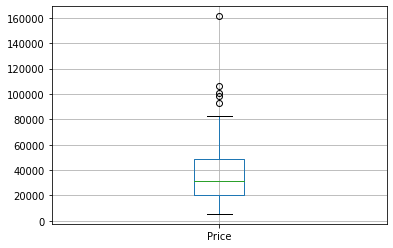

In [37]:
# Outliers in the Price column.
df.boxplot('Price')

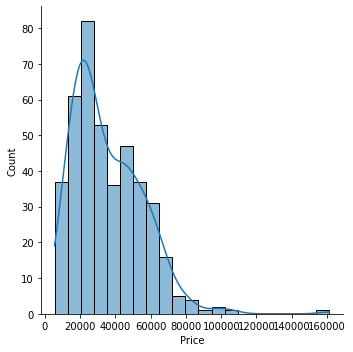

In [38]:
# As it follows normal distribution, we will use IQR method for outliers removal.
sns.displot(df['Price'], kde =True)

In [39]:
# Min value is 5440 and max. value is 161327.
df['Price'].describe()

count       414.000000
mean      35597.804106
std       19890.892075
min        5440.400000
25%       20482.700000
50%       31224.200000
75%       48439.375000
max      161327.500000
Name: Price, dtype: float64

In [40]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df["Price"].quantile(0.25)
q2 = df["Price"].quantile(0.75)

In [41]:
#finding out the value of Inter Quartile Range
IQR = q2 - q1

In [42]:
# Calculating lower and upper boundry.
lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-21452.312500000007
90374.38750000001


(None, None)

In [43]:
# Capping the outliers.
df.loc[df['Price'] >= upper_bridge,'Price'] = upper_bridge

<AxesSubplot:>

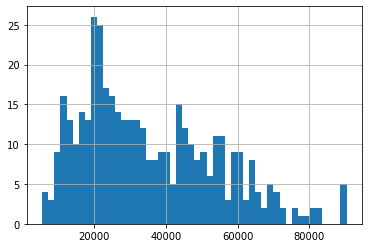

In [44]:
df['Price'].hist(bins=50)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

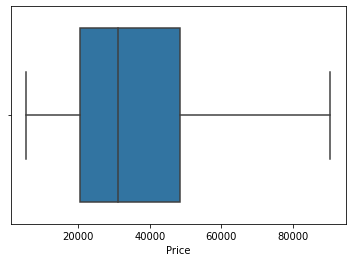

In [45]:
sns.boxplot(df['Price'])

Outliers removed.

In [46]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price,House_color
Transaction date,,,,,,,,,,
2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5,cyan
2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0,blue
2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0,green
2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0,blue
2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1,cyan


# Feature Selection

In [47]:
# Dropping the feature -'House_color', as it is of no use now.
df = df.drop('House_color', axis =1)

In [48]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
Transaction date,,,,,,,,,
2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1


In [49]:
# Finding correlation of all the features with respect to Target feature-'Price'
df.corr()['Price'].sort_values(ascending=False)

Price                                       1.000000
House size (sqft)                           0.725111
House price of unit area                    0.674233
Number of bedrooms                          0.574721
Number of convenience stores                0.409351
latitude                                    0.392967
longitude                                   0.364823
House Age                                  -0.198294
Distance from nearest Metro station (km)   -0.484178
Name: Price, dtype: float64

1. Features which are highly positive correlated-'House size','House price of unit area','Number of bedrooms','Number of convenience stores'
2. Features which are highly negative correlated- 'Distance from nearest Metro station (km)','House Age'
3. As latitude and longitude does not impact Price as much, and also it does not affect the model accuracy much, hence we are including it for model training.

In [50]:
# Converting latitude and longitude into radians.
df['latitude'] = df['latitude'].apply(radians)
df['longitude'] = df['longitude'].apply(radians)

In [51]:
# Separating Independent and dependent features.
y = df['Price']
X = df.drop('Price', axis=1)

In [52]:
# Independent features.
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,,,,,,,,
2012,32.0,84.87882,10,0.436035,2.121277,1,575,37.9
2012,19.5,306.59470,9,0.435989,2.121265,2,1240,42.2
2013,13.3,561.98450,5,0.436113,2.121341,3,1060,47.3
2013,13.3,561.98450,5,0.436113,2.121341,2,875,54.8
2012,5.0,390.56840,5,0.435972,2.121316,1,491,43.1
...,...,...,...,...,...,...,...,...
2013,13.7,3201.71030,0,0.435312,2.120642,3,803,15.4
2012,5.6,90.45606,9,0.435884,2.121327,2,1278,50.0
2013,18.8,390.96960,7,0.435970,2.121271,1,503,40.6


In [53]:
# Dependent feature.
y

Transaction date
2012    21792.5
2012    52328.0
2013    50138.0
2013    47950.0
2012    21162.1
         ...   
2013    12366.2
2012    63900.0
2013    20421.8
2013    31342.5
2013    70098.3
Name: Price, Length: 414, dtype: float64

In [54]:
# Applying train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [55]:
# train data size.
X_train.shape

(277, 8)

In [56]:
# test data size.
X_test.shape

(137, 8)

## Feature Scaling

In [57]:
# Initialization of standard scaler.
scaler = StandardScaler()

In [58]:
# transforming train data using fit_tranform function.
X_train = scaler.fit_transform(X_train)

In [59]:
# tranforming test data using tranform function to save of model from data leakage problem.
X_test = scaler.transform(X_test)

## Model Training.

In [60]:
regression = RandomForestRegressor()
regression.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
# Model Evaluation using cross validation
cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

array([ -5440069.79078077,  -3782737.51736938, -16141943.10451096,
        -5148961.67444883,  -3456348.87005378,  -6990930.2325638 ,
        -4370842.93713529,  -5994678.16175702,  -7285606.65476689,
        -5059920.18177206])

In [62]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [63]:
np.mean(-mse)

6191659.791828684

In [64]:
# Calculating rmse scores
rmse_scores= np.sqrt(-mse)
rmse_scores

array([2252.25997473, 1955.49395708, 3825.42330403, 2242.4554768 ,
       1817.40783506, 2789.51336932, 2170.09601376, 2227.54961571,
       2451.59171462, 2567.40029539])

In [65]:
# Calculating error.
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

print_scores(rmse_scores)

Scores: [2252.25997473 1955.49395708 3825.42330403 2242.4554768  1817.40783506
 2789.51336932 2170.09601376 2227.54961571 2451.59171462 2567.40029539]
Mean: 2429.9191556501205
Standard Deviation 535.86629753446


## Prediction

In [66]:
regression.predict(X_test)

array([43842.178   , 47325.029   , 61213.9     , 18138.254   ,
       28303.281   , 51129.76    , 30925.717   , 24671.483   ,
        8820.476   , 50190.792   , 14244.999   , 16346.109   ,
       29491.233   , 16796.004   , 29631.963   , 29647.499   ,
       37578.93    , 64732.977   , 15063.172   , 52146.066   ,
        6525.258   , 25530.589   , 54792.388   , 21688.381   ,
       22086.95    , 15488.567   , 20899.857   , 42010.558   ,
       38728.155   , 30425.753   , 24102.148   , 34563.794   ,
       14540.753   , 24741.19    , 27273.407   , 43051.544   ,
       27522.854   , 15620.536   , 56613.983   , 30938.055   ,
       66651.223875, 37481.321   , 21729.62    , 20513.381   ,
       35086.091   , 28250.544   , 25309.208   , 11643.116   ,
       68150.684875, 50789.599   , 23599.961   , 28991.008   ,
       44909.791   , 22875.885   , 18402.987   , 23358.855   ,
       33200.742   , 42109.748   , 33109.173   , 57886.932   ,
       34629.286   , 25345.064   , 21594.28    , 21061.

In [67]:
reg_predict = regression.predict(X_test)

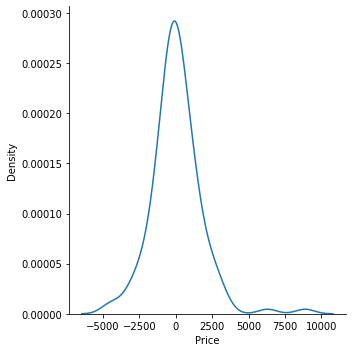

In [68]:
# Plotting predicted - actual value.
sns.displot(reg_predict - y_test, kind='kde')

Distance is very good from the above graph, as it falls in the variance range of -5000 to 5000, which is very good.

In [69]:
# finding r2 score
score = r2_score(reg_predict, y_test)

In [70]:
score

0.9886013657750207

#### 1. Linear Regression: This model assumes linear relationships between the features, hence it gives a straight line during fitting.

    Mean: 4549.916183822997
    Standard Deviation/Error: 829.863743230809
    Accuracy/r2 score = 93%
    
#### 2. Decision Tree Regressor: This model is prone to overfitting but supports non-linearity. Hence it gives better results than Linear Regression.

    Mean: 3644.4593913710487
    Standard Deviation/Error: 604.0465859327052
    Accuracy/r2 score = 97%
    
#### 3. Random forest Regressor: This model is a combination of multiple decision trees hence it gives the average result of all the decision trees present inside it. It also handles the overfitting problem due to its randomness nature, thats why it gives better results than a single decision tree.

    Mean: 2396.6078387186235
    Standard Deviation 493.3366982557698
    Accuracy/r2 score = 98.7%